# Data Analysis of Loan Data

This notebook describes the analytical approach to re-creating the lendingclub data and its trends.

---

## Import Libraries and Dependencies

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

# from sklearn.metrics import balanced_accuracy_score
# from sklearn.metrics import confusion_matrix
# from imblearn.metrics import classification_report_imbalanced

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

## Read the CSV and Perform Basic Data Cleaning

In [2]:
# https://help.lendingclub.com/hc/en-us/articles/215488038-What-do-the-different-Note-statuses-mean-

# Set columns
columns = [
    "loan_amnt", "int_rate", "installment", "home_ownership",
    "annual_inc", "verification_status", "issue_d", "loan_status",
    "pymnt_plan", "dti", "delinq_2yrs", "inq_last_6mths",
    "open_acc", "pub_rec", "revol_bal", "total_acc",
    "initial_list_status", "out_prncp", "out_prncp_inv", "total_pymnt",
    "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee",
    "recoveries", "collection_recovery_fee", "last_pymnt_amnt", "next_pymnt_d",
    "collections_12_mths_ex_med", "policy_code", "application_type", "acc_now_delinq",
    "tot_coll_amt", "tot_cur_bal", "open_acc_6m", "open_act_il",
    "open_il_12m", "open_il_24m", "mths_since_rcnt_il", "total_bal_il",
    "il_util", "open_rv_12m", "open_rv_24m", "max_bal_bc",
    "all_util", "total_rev_hi_lim", "inq_fi", "total_cu_tl",
    "inq_last_12m", "acc_open_past_24mths", "avg_cur_bal", "bc_open_to_buy",
    "bc_util", "chargeoff_within_12_mths", "delinq_amnt", "mo_sin_old_il_acct",
    "mo_sin_old_rev_tl_op", "mo_sin_rcnt_rev_tl_op", "mo_sin_rcnt_tl", "mort_acc",
    "mths_since_recent_bc", "mths_since_recent_inq", "num_accts_ever_120_pd", "num_actv_bc_tl",
    "num_actv_rev_tl", "num_bc_sats", "num_bc_tl", "num_il_tl",
    "num_op_rev_tl", "num_rev_accts", "num_rev_tl_bal_gt_0",
    "num_sats", "num_tl_120dpd_2m", "num_tl_30dpd", "num_tl_90g_dpd_24m",
    "num_tl_op_past_12m", "pct_tl_nvr_dlq", "percent_bc_gt_75", "pub_rec_bankruptcies",
    "tax_liens", "tot_hi_cred_lim", "total_bal_ex_mort", "total_bc_limit",
    "total_il_high_credit_limit", "hardship_flag", "debt_settlement_flag"
]

# Set target label
target = ["loan_status"]

# Load the data
file_path = Path('LoanStats_2019Q1.csv.zip')
df = pd.read_csv(file_path, skiprows=1)[:-2]
df = df.loc[:, columns].copy()

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()

# Remove the `Issued` loan status
issued_mask = df['loan_status'] != 'Issued'
df = df.loc[issued_mask]

# convert interest rate to numerical
df['int_rate'] = df['int_rate'].str.replace('%', '')
df['int_rate'] = df['int_rate'].astype('float') / 100

# Convert the target column values to low_risk and high_risk based on their values
x = {'Current': 'low_risk'}   
df = df.replace(x)
x = dict.fromkeys(['Late (31-120 days)', 'Late (16-30 days)', 'Default', 'In Grace Period'], 'high_risk')    
df = df.replace(x)

# Reset index
df.reset_index(inplace=True, drop=True)

# Diplay a few rows
df.head()

loan_amnt  int_rate  installment home_ownership  annual_inc  \
0    10500.0    0.1719       375.35           RENT     66000.0   
1    25000.0    0.2000       929.09       MORTGAGE    105000.0   
2    20000.0    0.2000       529.88       MORTGAGE     56000.0   
3    10000.0    0.1640       353.55           RENT     92000.0   
4    22000.0    0.1474       520.39       MORTGAGE     52000.0   

  verification_status   issue_d loan_status pymnt_plan    dti  delinq_2yrs  \
0     Source Verified  Mar-2019    low_risk          n  27.24          0.0   
1            Verified  Mar-2019    low_risk          n  20.23          0.0   
2            Verified  Mar-2019    low_risk          n  24.26          0.0   
3            Verified  Mar-2019    low_risk          n  31.44          0.0   
4        Not Verified  Mar-2019    low_risk          n  18.76          0.0   

   inq_last_6mths  open_acc  pub_rec  revol_bal  total_acc  \
0             0.0       8.0      0.0     1609.0       14.0   
1             0.0      17.0      1.0    18368.0       34.0   
2             0.0       8.0      0.0    13247.0       21.0   
3             1.0      10.0      1.0    17996.0       23.0   
4             1.0      14.0      0.0     9091.0       28.0   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   w   10204.87       10204.87       355.29           355.29   
1                   w   24293.13       24293.13       873.53           873.53   
2                   w   19636.79       19636.79       485.44           485.44   
3                   w    9719.34        9719.34       335.33           335.33   
4                   w   21614.73       21614.73       484.36           484.36   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0           295.13          60.16                 0.0         0.0   
1           706.87         166.66                 0.0         0.0   
2           363.21         122.23                 0.0         0.0   
3           280.66          54.67                 0.0         0.0   
4           385.27          99.09                 0.0         0.0   

   collection_recovery_fee  last_pymnt_amnt next_pymnt_d  \
0                      0.0           375.35     May-2019   
1                      0.0           929.09     May-2019   
2                      0.0           529.88     May-2019   
3                      0.0           353.55     May-2019   
4                      0.0           520.39     May-2019   

   collections_12_mths_ex_med  policy_code application_type  acc_now_delinq  \
0                         0.0          1.0       Individual             0.0   
1                         0.0          1.0       Individual             0.0   
2                         0.0          1.0       Individual             0.0   
3                         0.0          1.0       Individual             0.0   
4                         0.0          1.0       Individual             0.0   

   tot_coll_amt  tot_cur_bal  open_acc_6m  open_act_il  open_il_12m  \
0         178.0      38199.0          3.0          4.0          2.0   
1         165.0     228119.0          3.0          3.0          2.0   
2           0.0      45684.0          2.0          3.0          2.0   
3           0.0      68784.0          0.0          4.0          1.0   
4           0.0     177745.0          0.0          1.0          0.0   

   open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  \
0          4.0                 3.0       36590.0     59.0          1.0   
1          3.0                 4.0       42273.0     86.0          4.0   
2          3.0                 4.0       32437.0     75.0          2.0   
3          3.0                 9.0       50788.0     66.0          0.0   
4          2.0                14.0       16828.0     84.0          1.0   

   open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  total_cu_tl  \
0          2.0      1553.0      58.0            3700.0     1.0          0.0

## Reduce the DataFrame Further

In [3]:
# Set reduced columns
columns = [
    'loan_amnt', 
    'int_rate',
    'installment',
    'home_ownership',
    'annual_inc',
    'verification_status',
    'issue_d',
    'loan_status',
    'pymnt_plan',
    'dti',
    'delinq_2yrs',
    'inq_last_6mths',
    'open_acc',
    'pub_rec',
    'revol_bal',
    'total_acc',
    'initial_list_status',
    'out_prncp',
    'out_prncp_inv',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee'
]

# Slice the dataframe to reduced columns only
analysis_df = df.loc[:, columns].copy()

# Display a few rows
analysis_df.head()

loan_amnt  int_rate  installment home_ownership  annual_inc  \
0    10500.0    0.1719       375.35           RENT     66000.0   
1    25000.0    0.2000       929.09       MORTGAGE    105000.0   
2    20000.0    0.2000       529.88       MORTGAGE     56000.0   
3    10000.0    0.1640       353.55           RENT     92000.0   
4    22000.0    0.1474       520.39       MORTGAGE     52000.0   

  verification_status   issue_d loan_status pymnt_plan    dti  delinq_2yrs  \
0     Source Verified  Mar-2019    low_risk          n  27.24          0.0   
1            Verified  Mar-2019    low_risk          n  20.23          0.0   
2            Verified  Mar-2019    low_risk          n  24.26          0.0   
3            Verified  Mar-2019    low_risk          n  31.44          0.0   
4        Not Verified  Mar-2019    low_risk          n  18.76          0.0   

   inq_last_6mths  open_acc  pub_rec  revol_bal  total_acc  \
0             0.0       8.0      0.0     1609.0       14.0   
1             0.0      17.0      1.0    18368.0       34.0   
2             0.0       8.0      0.0    13247.0       21.0   
3             1.0      10.0      1.0    17996.0       23.0   
4             1.0      14.0      0.0     9091.0       28.0   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   w   10204.87       10204.87       355.29           355.29   
1                   w   24293.13       24293.13       873.53           873.53   
2                   w   19636.79       19636.79       485.44           485.44   
3                   w    9719.34        9719.34       335.33           335.33   
4                   w   21614.73       21614.73       484.36           484.36   

   total_rec_prncp  total_rec_int  total_rec_late_fee  
0           295.13          60.16                 0.0  
1           706.87         166.66                 0.0  
2           363.21         122.23                 0.0  
3           280.66          54.67                 0.0  
4           385.27          99.09                 0.0

## Describe All Data

In [4]:
# Describe all data, categorical included
analysis_df.describe(include='all')

loan_amnt      int_rate   installment home_ownership    annual_inc  \
count   68817.000000  68817.000000  68817.000000          68817  6.881700e+04   
unique           NaN           NaN           NaN              4           NaN   
top              NaN           NaN           NaN       MORTGAGE           NaN   
freq             NaN           NaN           NaN          36219           NaN   
mean    16677.594562      0.127718    480.652863            NaN  8.821371e+04   
std     10277.348590      0.048130    288.062432            NaN  1.155800e+05   
min      1000.000000      0.060000     30.890000            NaN  4.000000e+01   
25%      9000.000000      0.088100    265.730000            NaN  5.000000e+04   
50%     15000.000000      0.118000    404.560000            NaN  7.300000e+04   
75%     24000.000000      0.155700    648.100000            NaN  1.040000e+05   
max     40000.000000      0.308400   1676.230000            NaN  8.797500e+06   

       verification_status   issue_d loan_status pymnt_plan           dti  \
count                68817     68817       68817      68817  68817.000000   
unique                   3         3           2          1           NaN   
top           Not Verified  Jan-2019    low_risk          n           NaN   
freq                 32895     31041       68470      68817           NaN   
mean                   NaN       NaN         NaN        NaN     21.778153   
std                    NaN       NaN         NaN        NaN     20.199244   
min                    NaN       NaN         NaN        NaN      0.000000   
25%                    NaN       NaN         NaN        NaN     13.890000   
50%                    NaN       NaN         NaN        NaN     19.760000   
75%                    NaN       NaN         NaN        NaN     26.660000   
max                    NaN       NaN         NaN        NaN    999.000000   

         delinq_2yrs  inq_last_6mths      open_acc       pub_rec  \
count   68817.000000    68817.000000  68817.000000  68817.000000   
unique           NaN             NaN           NaN           NaN   
top              NaN             NaN           NaN           NaN   
freq             NaN             NaN           NaN           NaN   
mean        0.217766        0.497697     12.587340      0.126030   
std         0.718367        0.758122      6.022869      0.336797   
min         0.000000        0.000000      2.000000      0.000000   
25%         0.000000        0.000000      8.000000      0.000000   
50%         0.000000        0.000000     11.000000      0.000000   
75%         0.000000        1.000000     16.000000      0.000000   
max        18.000000        5.000000     72.000000      4.000000   

            revol_bal     total_acc initial_list_status     out_prncp  \
count    68817.000000  68817.000000               68817  68817.000000   
unique            NaN           NaN                   2           NaN   
top               NaN           NaN                   w           NaN   
freq              NaN           NaN               60292           NaN   
mean     17604.142828     24.666347                 NaN  16018.845833   
std      21835.880400     12.318917                 NaN  10002.695495   
min          0.000000      3.000000                 NaN      0.000000   
25%       6293.000000     16.000000                 NaN   8578.800000   
50%      12068.000000     23.000000                 NaN  14067.750000   
75%      21735.000000     31.000000                 NaN  22860.700000   
max     587191.000000    164.000000                 NaN  40000.000000   

        out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
count    68817.000000  68817.000000     68817.000000     68817.000000   
unique            NaN           NaN              NaN              NaN   
top               NaN           NaN              NaN              NaN   
freq              NaN           NaN              NaN              NaN   
mean     16015.919519    970.639473       970.431151  

## Analyze Frequency Distribution of Target Label (Low Risk vs. High Risk) 

In [5]:
# Check distribution of loan_status
analysis_df['loan_status'].value_counts()

low_risk     68470
high_risk      347
Name: loan_status, dtype: int64

## Filter By Low Risk Loans

In [6]:
# Slice dataframe to low risk records only
low_risk_df = analysis_df.loc[analysis_df['loan_status'] == 'low_risk', :]
low_risk_df.reset_index(inplace=True, drop=True)
low_risk_df.head()

loan_amnt  int_rate  installment home_ownership  annual_inc  \
0    10500.0    0.1719       375.35           RENT     66000.0   
1    25000.0    0.2000       929.09       MORTGAGE    105000.0   
2    20000.0    0.2000       529.88       MORTGAGE     56000.0   
3    10000.0    0.1640       353.55           RENT     92000.0   
4    22000.0    0.1474       520.39       MORTGAGE     52000.0   

  verification_status   issue_d loan_status pymnt_plan    dti  delinq_2yrs  \
0     Source Verified  Mar-2019    low_risk          n  27.24          0.0   
1            Verified  Mar-2019    low_risk          n  20.23          0.0   
2            Verified  Mar-2019    low_risk          n  24.26          0.0   
3            Verified  Mar-2019    low_risk          n  31.44          0.0   
4        Not Verified  Mar-2019    low_risk          n  18.76          0.0   

   inq_last_6mths  open_acc  pub_rec  revol_bal  total_acc  \
0             0.0       8.0      0.0     1609.0       14.0   
1             0.0      17.0      1.0    18368.0       34.0   
2             0.0       8.0      0.0    13247.0       21.0   
3             1.0      10.0      1.0    17996.0       23.0   
4             1.0      14.0      0.0     9091.0       28.0   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   w   10204.87       10204.87       355.29           355.29   
1                   w   24293.13       24293.13       873.53           873.53   
2                   w   19636.79       19636.79       485.44           485.44   
3                   w    9719.34        9719.34       335.33           335.33   
4                   w   21614.73       21614.73       484.36           484.36   

   total_rec_prncp  total_rec_int  total_rec_late_fee  
0           295.13          60.16                 0.0  
1           706.87         166.66                 0.0  
2           363.21         122.23                 0.0  
3           280.66          54.67                 0.0  
4           385.27          99.09                 0.0

## Describe Rows with Low Risk Loans

In [7]:
low_risk_df.describe(include='all')

loan_amnt      int_rate   installment home_ownership    annual_inc  \
count   68470.000000  68470.000000  68470.000000          68470  6.847000e+04   
unique           NaN           NaN           NaN              4           NaN   
top              NaN           NaN           NaN       MORTGAGE           NaN   
freq             NaN           NaN           NaN          36036           NaN   
mean    16679.602746      0.127603    480.588604            NaN  8.818444e+04   
std     10276.331758      0.048074    287.948633            NaN  1.157434e+05   
min      1000.000000      0.060000     30.890000            NaN  4.000000e+01   
25%      9000.000000      0.088100    265.730000            NaN  5.000000e+04   
50%     15000.000000      0.118000    404.560000            NaN  7.300000e+04   
75%     24000.000000      0.155700    647.800000            NaN  1.040000e+05   
max     40000.000000      0.308400   1676.230000            NaN  8.797500e+06   

       verification_status   issue_d loan_status pymnt_plan           dti  \
count                68470     68470       68470      68470  68470.000000   
unique                   3         3           1          1           NaN   
top           Not Verified  Jan-2019    low_risk          n           NaN   
freq                 32743     30838       68470      68470           NaN   
mean                   NaN       NaN         NaN        NaN     21.778733   
std                    NaN       NaN         NaN        NaN     20.174969   
min                    NaN       NaN         NaN        NaN      0.000000   
25%                    NaN       NaN         NaN        NaN     13.900000   
50%                    NaN       NaN         NaN        NaN     19.760000   
75%                    NaN       NaN         NaN        NaN     26.660000   
max                    NaN       NaN         NaN        NaN    999.000000   

         delinq_2yrs  inq_last_6mths      open_acc       pub_rec  \
count   68470.000000    68470.000000  68470.000000  68470.000000   
unique           NaN             NaN           NaN           NaN   
top              NaN             NaN           NaN           NaN   
freq             NaN             NaN           NaN           NaN   
mean        0.217175        0.496451     12.590010      0.126041   
std         0.717890        0.756716      6.023198      0.336790   
min         0.000000        0.000000      2.000000      0.000000   
25%         0.000000        0.000000      8.000000      0.000000   
50%         0.000000        0.000000     11.000000      0.000000   
75%         0.000000        1.000000     16.000000      0.000000   
max        18.000000        5.000000     72.000000      4.000000   

            revol_bal     total_acc initial_list_status     out_prncp  \
count    68470.000000  68470.000000               68470  68470.000000   
unique            NaN           NaN                   2           NaN   
top               NaN           NaN                   w           NaN   
freq              NaN           NaN               59993           NaN   
mean     17606.489295     24.662568                 NaN  16020.040460   
std      21799.158231     12.310812                 NaN  10000.728679   
min          0.000000      3.000000                 NaN      0.000000   
25%       6299.000000     16.000000                 NaN   8578.800000   
50%      12081.000000     23.000000                 NaN  14071.210000   
75%      21741.000000     31.000000                 NaN  22858.600000   
max     587191.000000    164.000000                 NaN  40000.000000   

        out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
count    68470.000000  68470.000000     68470.000000     68470.000000   
unique            NaN           NaN              NaN              NaN   
top               NaN           NaN              NaN              NaN   
freq              NaN           NaN              NaN              NaN   
mean     16017.112102    972.155345       971.946508  

## Filter By High Risk Loans

In [8]:
high_risk_df = analysis_df.loc[analysis_df['loan_status'] == 'high_risk', :]
high_risk_df.reset_index(inplace=True, drop=True)
high_risk_df.head()

loan_amnt  int_rate  installment home_ownership  annual_inc  \
0     4400.0    0.2000       163.52           RENT     41000.0   
1     5000.0    0.2880       208.99       MORTGAGE     80000.0   
2     5400.0    0.0819       169.70           RENT     58000.0   
3    11000.0    0.1474       379.92       MORTGAGE     80000.0   
4     1000.0    0.1797        36.14           RENT     21456.0   

  verification_status   issue_d loan_status pymnt_plan    dti  delinq_2yrs  \
0        Not Verified  Mar-2019   high_risk          n  31.82          0.0   
1     Source Verified  Mar-2019   high_risk          n  16.88          0.0   
2        Not Verified  Mar-2019   high_risk          n  36.50          0.0   
3     Source Verified  Mar-2019   high_risk          n  19.82          0.0   
4        Not Verified  Mar-2019   high_risk          n  16.72          1.0   

   inq_last_6mths  open_acc  pub_rec  revol_bal  total_acc  \
0             0.0      10.0      0.0     5912.0       34.0   
1             2.0      13.0      0.0   110328.0       18.0   
2             2.0      42.0      0.0    31039.0       81.0   
3             1.0      15.0      0.0    15662.0       28.0   
4             0.0       6.0      0.0     1348.0       17.0   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   w     4400.0         4400.0          0.0              0.0   
1                   w     5000.0         5000.0          0.0              0.0   
2                   f     5400.0         5375.0          0.0              0.0   
3                   w    11000.0        11000.0          0.0              0.0   
4                   w     1000.0         1000.0          0.0              0.0   

   total_rec_prncp  total_rec_int  total_rec_late_fee  
0              0.0            0.0                 0.0  
1              0.0            0.0                 0.0  
2              0.0            0.0                 0.0  
3              0.0            0.0                 0.0  
4              0.0            0.0                 0.0

## Describe Rows with High Risk Loans

In [9]:
high_risk_df.describe(include='all')

loan_amnt    int_rate  installment home_ownership     annual_inc  \
count     347.000000  347.000000   347.000000            347     347.000000   
unique           NaN         NaN          NaN              4            NaN   
top              NaN         NaN          NaN       MORTGAGE            NaN   
freq             NaN         NaN          NaN            183            NaN   
mean    16281.340058    0.150352   493.332507            NaN   93987.910202   
std     10483.638133    0.053580   309.885688            NaN   76685.814812   
min      1000.000000    0.064600    35.230000            NaN    5500.000000   
25%      8050.000000    0.108700   267.840000            NaN   55500.000000   
50%     14000.000000    0.144700   398.590000            NaN   75000.000000   
75%     24000.000000    0.189400   680.910000            NaN  103500.000000   
max     40000.000000    0.288000  1381.530000            NaN  750000.000000   

       verification_status   issue_d loan_status pymnt_plan         dti  \
count                  347       347         347        347  347.000000   
unique                   3         3           1          1         NaN   
top           Not Verified  Jan-2019   high_risk          n         NaN   
freq                   152       203         347        347         NaN   
mean                   NaN       NaN         NaN        NaN   21.663746   
std                    NaN       NaN         NaN        NaN   24.558446   
min                    NaN       NaN         NaN        NaN    1.590000   
25%                    NaN       NaN         NaN        NaN   12.350000   
50%                    NaN       NaN         NaN        NaN   18.550000   
75%                    NaN       NaN         NaN        NaN   26.250000   
max                    NaN       NaN         NaN        NaN  356.770000   

        delinq_2yrs  inq_last_6mths    open_acc     pub_rec      revol_bal  \
count    347.000000      347.000000  347.000000  347.000000     347.000000   
unique          NaN             NaN         NaN         NaN            NaN   
top             NaN             NaN         NaN         NaN            NaN   
freq            NaN             NaN         NaN         NaN            NaN   
mean       0.334294        0.743516   12.060519    0.123919   17141.138329   
std        0.799606        0.967944    5.942822    0.338611   28196.753889   
min        0.000000        0.000000    3.000000    0.000000       0.000000   
25%        0.000000        0.000000    8.000000    0.000000    5374.000000   
50%        0.000000        0.000000   11.000000    0.000000   10273.000000   
75%        0.000000        1.000000   15.000000    0.000000   18925.500000   
max        6.000000        5.000000   42.000000    2.000000  326885.000000   

         total_acc initial_list_status     out_prncp  out_prncp_inv  \
count   347.000000                 347    347.000000     347.000000   
unique         NaN                   2           NaN            NaN   
top            NaN                   w           NaN            NaN   
freq           NaN                 299           NaN            NaN   
mean     25.412104                 NaN  15783.122133   15780.599164   
std      13.825300                 NaN  10395.795805   10398.505260   
min       3.000000                 NaN      0.000000       0.000000   
25%      16.000000                 NaN   8000.000000    7987.500000   
50%      23.000000                 NaN  13500.000000   13500.000000   
75%      31.000000                 NaN  23249.890000   23249.890000   
max      98.000000                 NaN  40000.000000   40000.000000   

         total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
count     347.000000       347.000000       347.000000     347.000000   
unique           NaN              NaN              NaN            NaN   
top              NaN              NaN              NaN            NaN   
freq             NaN              NaN              NaN            NaN   
mean  

## Visualize Frequency Distribution of Specified DataFrame and Column (Hard-Coded for Now)

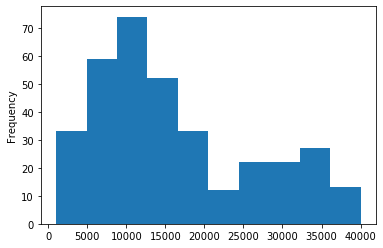

In [10]:
column = 'loan_amnt'

high_risk_df[column].plot.hist()

---

## Generate Fake Data (with Mean, Std Dev, Normal Distribution)

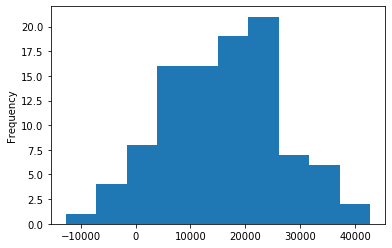

In [45]:
x = np.random.normal(loc=16281.34, scale=10483.64, size=100)
test_df = pd.DataFrame(x)
test_df[0].plot.hist()

## Generate Fake Data (with Pre-Defined Values and Weights)

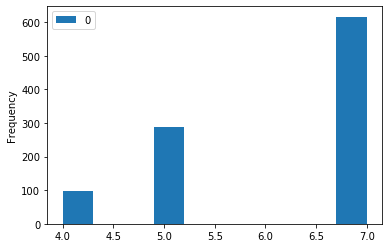

In [46]:
# from numpy import random

x = random.choice([4, 5, 7, 9], p=[0.1, 0.3, 0.6, 0.0], size=(1000))

df = pd.DataFrame(x)
df.plot.hist()

## Attempt to Re-Create High Risk `loan_amt` Distribution

In [54]:
freq_dist = high_risk_df[column].value_counts()
choice_values = freq_dist.index
print(freq_values)

Float64Index([10000.0, 12000.0, 15000.0, 35000.0,  5000.0, 20000.0, 30000.0,
              16000.0, 40000.0, 25000.0,  8000.0,  6000.0, 14000.0,  3000.0,
              24000.0,  4000.0,  7000.0,  2000.0,  1000.0, 19000.0, 17000.0,
              36000.0,  4800.0, 13000.0,  8500.0,  9000.0,  3600.0, 18000.0,
               6500.0, 12500.0,  1600.0, 23000.0, 14400.0, 11000.0, 11200.0,
               5400.0,  6400.0,  9500.0, 32000.0, 35700.0, 27500.0,  7200.0,
              25600.0, 26000.0,  8100.0, 33000.0, 12200.0,  7500.0, 11700.0,
              20575.0, 14500.0,  1200.0, 29250.0, 30750.0, 25900.0, 11450.0,
              16100.0, 12800.0, 21825.0,  9600.0, 19300.0, 34000.0,  6750.0,
               6575.0, 28000.0, 15300.0, 12600.0, 18100.0, 15500.0, 21000.0,
              10750.0,  4500.0, 16900.0, 30500.0, 28350.0,  4075.0, 15400.0,
              28500.0, 27775.0, 10500.0, 28425.0,  6025.0,  8800.0,  8400.0,
              38100.0, 19500.0, 13500.0, 11850.0, 27600.0,  5500.0, 11875.0,

In [55]:
freq_values = freq_dist.values
total = freq_values.sum()

calc_prob = lambda x: x / total
prob_values = calc_prob(freq_values)

print(prob_values)

[0.08933718 0.06051873 0.06051873 0.05475504 0.0518732  0.0518732
 0.04034582 0.03458213 0.03458213 0.03170029 0.02881844 0.02305476
 0.02017291 0.01729107 0.01729107 0.01440922 0.01440922 0.01440922
 0.01440922 0.01152738 0.00864553 0.00864553 0.00864553 0.00864553
 0.00864553 0.00864553 0.00864553 0.00864553 0.00576369 0.00576369
 0.00576369 0.00576369 0.00576369 0.00576369 0.00576369 0.00576369
 0.00576369 0.00576369 0.00576369 0.00576369 0.00576369 0.00576369
 0.00576369 0.00576369 0.00288184 0.00288184 0.00288184 0.00288184
 0.00288184 0.00288184 0.00288184 0.00288184 0.00288184 0.00288184
 0.00288184 0.00288184 0.00288184 0.00288184 0.00288184 0.00288184
 0.00288184 0.00288184 0.00288184 0.00288184 0.00288184 0.00288184
 0.00288184 0.00288184 0.00288184 0.00288184 0.00288184 0.00288184
 0.00288184 0.00288184 0.00288184 0.00288184 0.00288184 0.00288184
 0.00288184 0.00288184 0.00288184 0.00288184 0.00288184 0.00288184
 0.00288184 0.00288184 0.00288184 0.00288184 0.00288184 0.00288

In [58]:
x = random.choice(choice_values, p=prob_values, size=(10000))
df = pd.DataFrame(x)
df.head()

0
0  16100.0
1   7200.0
2  30000.0
3  25000.0
4  12000.0

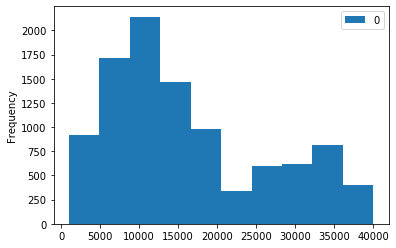

In [59]:
df.plot.hist()